<font size="+5">#10. Principal Component Analysis (PCA)</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data
> - This dataset contains **statistics** (columns)
> - About **Car Models** (rows)

https://blog.pythonassembly.com/python-tutorial-or-principal-component-analysis-made-simple

In [95]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
plymouth arrow gs,25.5,4,122.0,96.0,2300,15.5,77,usa
amc matador,15.0,6,258.0,110.0,3730,19.0,75,usa
chevrolet vega,21.0,4,140.0,72.0,2401,19.5,73,usa
mazda rx2 coupe,19.0,3,70.0,97.0,2330,13.5,72,japan
amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa
subaru dl,30.0,4,97.0,67.0,1985,16.4,77,japan
datsun pl510,27.0,4,97.0,88.0,2130,14.5,70,japan
plymouth valiant,22.0,6,225.0,100.0,3233,15.4,76,usa
pontiac lemans v6,21.5,6,231.0,115.0,3245,15.4,79,usa


# Data Preprocessing

- All variables need to be **comparables**.
- It is not the same to increase 1kg of weight, than 1m of height.
- We will use `StandardScaler()`.

In [96]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [99]:
import pandas as pd
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

In [100]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,0,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,0,0
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,0,1


In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
normdata = scaler.fit_transform(df)

In [104]:
dfnorm = pd.DataFrame(normdata, index=df.index, columns=df.columns)

In [105]:
dfnorm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...,...
ford mustang gl,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.50239,0.774597
vw pickup,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-0.50239,-1.290994
dodge rampage,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.50239,0.774597


# `KMeans()` Model in Python

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [106]:
from sklearn.cluster import KMeans

In [107]:
model = KMeans(n_clusters=3)

## Get the `cluster` for all USA States

> - `model.` + `↹`

In [108]:
model.fit(dfnorm)

KMeans(n_clusters=3)

In [109]:
pred = model.predict(dfnorm)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [110]:
dfsel = df.copy()

In [111]:
dfsel.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,1


> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [112]:
dfsel['cluster'] = pred
dfsel

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,cluster
name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1,0
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1,0
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,1,0
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,1,0
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,1,0
...,...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,0,1,2
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,0,1,2


## Model Visualization

> - You may `hue=` the points with the `cluster` column

``
De estos 2 gráficos cual tiene sentido representar?
``

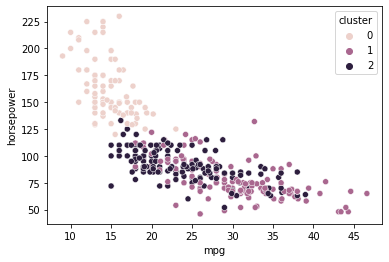

In [113]:
sns.scatterplot(x="mpg", y="horsepower", hue="cluster", data=dfsel);

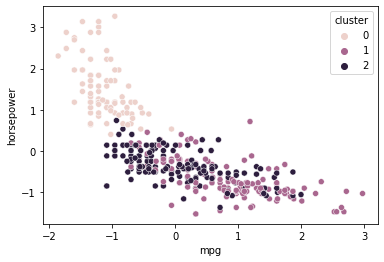

In [114]:
sns.scatterplot(x=dfnorm.mpg, y=dfnorm.horsepower, hue=dfsel.cluster);

## Model Interpretation

> - Does the visualization makes sense?
> - The points are mixed between the groups, why?
> - We are **just representing 2 variables**
> - And the model was **fitted with 7 variables**

# Grouping Variables with `PCA()`

In [115]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/HMOI_lkzW08" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Transform Data to Components

> - `PCA()` is another technique used to transform data.
> How has the data been manipulated so far?
> 1. Original Data `df`
> 2. Normalized Data `dfnorm`
> 3. Principal Components Data `dfpca` (now)

In [116]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA()

In [118]:
pcadata = pca.fit_transform(dfnorm)

In [134]:
list = [i for i in range(1,10)]
cols = []

for i in list:
    cols.append('PC' + str(i))

In [135]:
cols

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [136]:
dfpca = pd.DataFrame(pcadata, index=dfnorm.index, columns=cols)

In [137]:
dfpca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
name,,,,,,,,,
chevrolet chevelle malibu,2.768102,0.653669,0.661643,-0.585333,-0.382837,0.750140,-0.468860,-0.095520,-0.120586
buick skylark 320,3.561796,0.961842,0.474659,-0.511149,-0.199102,0.489416,0.009370,0.213293,0.073620
plymouth satellite,3.070489,0.942217,0.473735,-0.870489,-0.313946,0.723960,-0.214271,0.143188,-0.083888
amc rebel sst,3.020337,0.789743,0.661786,-0.571355,-0.319349,0.528048,-0.229069,0.292331,-0.147325
ford torino,3.007717,0.965885,0.517871,-0.996022,-0.358667,0.575475,-0.469787,-0.001799,-0.174247
...,...,...,...,...,...,...,...,...,...
ford mustang gl,-0.982108,-1.420514,-1.047497,-0.683221,-0.120900,-0.637493,0.201264,-0.166382,0.015283
vw pickup,-4.036985,-2.127140,-0.261675,1.418216,1.221944,1.416191,0.579246,0.291104,0.119184
dodge rampage,-1.126808,-0.789214,-1.522869,-2.097001,-0.237654,-0.251873,-0.030813,-0.221787,0.045670


## Visualize Components & Clusters

> - A **scatterplot** with `PC1` & `PC2`
> - Colour points by `cluster`
> - Are they **mixed** now?

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

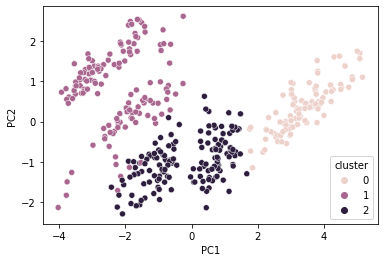

In [138]:
sns.scatterplot(x='PC1', y='PC2', data=dfpca, hue=dfsel.cluster)

## Relationship between Original Variables & Components

### Loading Vectors

In [139]:
pca.explained_variance_ratio_

array([0.62920572, 0.13167304, 0.09705901, 0.06659198, 0.03362041,
       0.02024791, 0.01234709, 0.00589172, 0.00336312])

### Calculating One PCA Value

### Biplot

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand the role of **Linear Algebra** on Machine Learning
    - Matrix Multiplications with the `loadings`
- [ ] Necessity to `StandardScaler()` the data when the algorithm implies distance calculations
- [ ] Understand that every Machine Learning process is a matter of optimization
    - To find the best numbers based on a criteria
    - How is done in `PCA()`?
- [ ] Why would you use PCA?
    - Visualization
    - Preprocess the data for modelling
- [ ] There are techniques for everything
    - [ ] Grouping observations
    - [ ] Grouping variables